# Capstone Project - The Battle of Neighborhoods
Created with IBM Watson Studio

Suitable find the best Locations in Paris for a Pub
This notebook contains multiple parts:

A description of the problem and a discussion of the background - Week 1

A description of the data and how it will be used to solve the problem - Week 1

Methodology and Exploratory Data Analysis - Week 2

Inferences and Discussion - Week 2

The seperate report goes into more decription of the methodology. This notebook gives only brief outlines of the methodology of each step, but includes all the code, dataframes and visualisations.

## 1 Introduction and Discussion of the Business Objective and Problem

**Locations for Pub in High Night activities Areas in Paris France**
The Task At Hand

A group of investor want to open in a Pub in Paris. Guessing where the best locations were to open its critical, as part of their strategy for Pari's pub, so they've decided to be more informed and selective, and take the time to do some research.

I've been given the exciting task of assisting them to make data-driven decisions on the new locations that are most suitable for their new Pub in Paris. This will be a major part of their decision-making process, the other being on the ground qualitative analysis of districts once this data and report are reviewed and studied.

They have already a well known pub brand. As such, they seek for the turist market. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

**Criteria**

Qualitative data from another Pubs, Nightclub, Bars etc, that they know, suggests that the best locations to open new pub may not only be where other night activities are located. This data strongly suggests that the best places are in fact areas that are near Nightclubs,Cocktail Bars, Beer Bars and Hotels. 

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

**Why Data?**

Without leveraging data to make decisions about new locations, the company could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.

Data will provide better answers and better solutions to their task at hand.

**Outcomes**

The goal is to identify the best districts - Arrondissements - to open new Pub as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open pubs.

## 2 The Data Science Workflow
**Data Requirements**

The main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where people go for night entertainment and hotels. 

**The Data Science Workflow for Part 1 & 2 includes the following:**

Outline the initial data that is required:
District data for Paris including names, location data if available, and any other details required.
Obtain the Data:
Research and find suitable sources for the district data for Paris.
Access and explore the data to determine if it can be manipulated for our purposes.
Initial Data Wrangling and Cleaning:
Clean the data and convert to a useable form as a dataframe.
The Data Science Workflow for parts 3 & 4 includes:

**Data Analysis and Location Data:**

Foursquare location data will be leveraged to explore or compare districts around Paris.

Data manipulation and analysis to derive subsets of the initial data.

Identifying the high concentration of night entertainment  areas using data visualisation and tatistical nalysis.

**Visualization:**

Analysis and plotting visualizations.

Data visualization using various mapping libraries.

**Discussion and Conclusions:**

Recomendations and results based on the data analysis.

Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

### Import the Required Libraries

In [3]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# Data Research and Preparation
**Import the Paris District Data**

Arrondissements Municipaux for Paris CSV (administrative districts)
Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

In [4]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [5]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris


,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


## Exploring, Wrangling and Cleaning the Data
Rename the columns 'Geometry_X' and 'Geometry_Y', "CAR' to 'Arrondissement' etc...

In [6]:
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


## Week 1:
### Discussion of the Business Objective and Problem / The Data Workflow
We now have located and imported the relevant data for the districts of Paris, and have constructed a dataframe.

Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.

Next up, we will leverage Foursquare location data to obtain data on night live occurs - where clients go for partying, drinking and entertainment - in all of the 20 districts.

The Battle of Neighborhoods continues in the next section.

Paris Pub

## Week 2 - Data Analysis
### 3 Methodology and Exploratory Data Analysis

**The Data Science Workflow for parts 3 & 4 includes:**

**Data Analysis and Location Data:**

Foursquare location data will be leveraged to explore or compare districts around Paris.

Data manipulation and analysis to derive subsets of the initial data.

Identifying the high traffic areas using data visualisation and tatistical analysis.

**Visualization:**

Analysis and plotting visualizations.

Data visualization using various mapping libraries.

**Discussion and Conclusions:**

Recomendations and results based on the data analysis.

Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

In [7]:
# Check the shape of the dataframe
paris.shape

(20, 5)

## Use the geopy library to get the latitude and longitude values of Paris

In [8]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


## Create a map of Paris with districts superimposed

In [9]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)
**Define Foursquare Credentials and Version**

In [10]:
CLIENT_ID = 'VFAFO4U5Y0J14E4EMYVJPCMUPS5VKBS33MJ5DKDFL55J3OMO' # your Foursquare ID
CLIENT_SECRET = 'ZFEAG1W1ABKZPH1QMNNXH30R15ULTFHQRY3BIQALHJXGGMVC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VFAFO4U5Y0J14E4EMYVJPCMUPS5VKBS33MJ5DKDFL55J3OMO
CLIENT_SECRET:ZFEAG1W1ABKZPH1QMNNXH30R15ULTFHQRY3BIQALHJXGGMVC


## Create a nearby venues function for all the neighborhoods in Paris


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Create a new dataframe called for the venues of Paris called paris-venues
**To start explroring the data of the venues**

In [14]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [15]:
print(paris_venues.shape)
paris_venues.head(10)

(1359, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
5,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
6,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
7,3eme Ardt,48.862872,2.360001,Les Enfants Rouges,48.863013,2.361260,Wine Bar
8,3eme Ardt,48.862872,2.360001,Bontemps,48.863956,2.360725,Dessert Shop
9,3eme Ardt,48.862872,2.360001,Gramme,48.863121,2.360375,Restaurant


## Check how many venues were returned for each neighborhood
**Please be aware of the 100 venue limit imposed by the free Foursquare account.**

In [16]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,67,67,67,67,67,67
12eme Ardt,5,5,5,5,5,5
13eme Ardt,61,61,61,61,61,61
14eme Ardt,28,28,28,28,28,28
15eme Ardt,59,59,59,59,59,59
16eme Ardt,11,11,11,11,11,11
17eme Ardt,55,55,55,55,55,55
18eme Ardt,45,45,45,45,45,45


## Calculate how many unique venue categories there are

In [17]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 199 unique venue categories.


## Create a dataframe and sorted to check and select the venues we use as indicators

In [18]:
p_v =(paris_venues['Venue Category'].unique())

In [19]:
Sor_p_v= sorted(p_v)
print(Sor_p_v) 

['Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Antique Shop', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auditorium', 'Baby Store', 'Bakery', 'Bank', 'Bar', 'Basque Restaurant', 'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Belgian Restaurant', 'Bike Rental / Bike Share', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Boxing Gym', 'Brasserie', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bridge', 'Bubble Tea Shop', 'Burger Joint', 'Burgundian Restaurant', 'Bus Station', 'Bus Stop', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Cambodian Restaurant', 'Canal', 'Candy Store', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Comedy Club', 'Comfort Food Restaurant', 'Concert Hall', 'Convenience Store', 'Corsican Restaurant', 'Cosmetics Shop', 'Coworking Space', 'Creperie', 'Cultural Center', 'Cupcake Shop'

### Analyze each of the Neighborhoods looking for the venues we are interested on:


In [20]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.drop(['Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Antique Shop', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auditorium', 'Baby Store', 'Bakery', 'Bank', 'Basque Restaurant', 'Bed & Breakfast', 'Belgian Restaurant', 'Bike Rental / Bike Share', 'Bistro', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Boxing Gym', 'Brasserie', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bridge', 'Bubble Tea Shop', 'Burger Joint', 'Burgundian Restaurant', 'Bus Station', 'Bus Stop', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Cambodian Restaurant', 'Canal', 'Candy Store', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store', 'Coffee Shop', 'Comedy Club', 'Comfort Food Restaurant', 'Concert Hall', 'Convenience Store', 'Corsican Restaurant', 'Cosmetics Shop', 'Coworking Space', 'Creperie', 'Cultural Center', 'Cupcake Shop', 'Deli / Bodega', 'Dessert Shop', 'Diner', 'Donut Shop', 'Electronics Store', 'Empanada Restaurant', 'Ethiopian Restaurant', 'Exhibit', 'Falafel Restaurant', 'Farmers Market', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Flower Shop', 'Food & Drink Shop', 'Fountain', 'French Restaurant', 'Furniture / Home Store', 'Garden', 'Gastropub', 'German Restaurant', 'Gift Shop', 'Gluten-free Restaurant', 'Gourmet Shop', 'Greek Restaurant', 'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Health & Beauty Service', 'Health Food Store', 'Historic Site', 'History Museum', 'Hostel', 'Hot Dog Joint', 'Hotel Bar', 'Ice Cream Shop', 'Indian Restaurant', 'Indie Movie Theater', 'Indonesian Restaurant', 'Insurance Office', 'Israeli Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Juice Bar', 'Korean Restaurant', 'Lake', 'Latin American Restaurant', 'Lebanese Restaurant', 'Liquor Store', 'Lounge', 'Lyonese Bouchon', 'Market', 'Mediterranean Restaurant', 'Memorial Site', "Men's Store", 'Metro Station', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Miscellaneous Shop', 'Modern European Restaurant', 'Monument / Landmark', 'Moroccan Restaurant', 'Movie Theater', 'Museum', 'Music Store', 'New American Restaurant', 'Non-Profit', 'Noodle House', 'Outdoor Sculpture', 'Paper / Office Supplies Store', 'Park', 'Pastry Shop', 'Pedestrian Plaza', 'Performing Arts Venue', 'Perfume Shop', 'Persian Restaurant', 'Peruvian Restaurant', 'Pharmacy', 'Pizza Place', 'Playground', 'Plaza', 'Poke Place', 'Pool', 'Portuguese Restaurant', 'Ramen Restaurant', 'Resort', 'Restaurant', 'Romanian Restaurant', 'Russian Restaurant', 'Salad Place', 'Salon / Barbershop', 'Sandwich Place', 'Scandinavian Restaurant', 'Science Museum', 'Sculpture Garden', 'Seafood Restaurant', 'Shanxi Restaurant', 'Shoe Store', 'Shop & Service', 'Shopping Mall', 'Snack Place', 'South American Restaurant', 'Southwestern French Restaurant', 'Souvlaki Shop', 'Spa', 'Spanish Restaurant', 'Speakeasy', 'Sporting Goods Shop', 'Sports Bar', 'Steakhouse', 'Supermarket', 'Sushi Restaurant', 'Szechuan Restaurant', 'Taco Place', 'Tailor Shop', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Theater', 'Toy / Game Store', 'Trail', 'Turkish Restaurant', 'Udon Restaurant', 'Vegetarian / Vegan Restaurant', 'Venezuelan Restaurant', 'Video Game Store', 'Vietnamese Restaurant', 'Wine Shop', "Women's Store", 'Yoga Studio', 'Zoo', 'Zoo Exhibit' ], axis=1, inplace=True)
paris_onehot


,Neighborhood,Bar,Beer Bar,Beer Garden,Beer Store,Cocktail Bar,Dive Bar,Hookah Bar,Hotel,Irish Pub,Nightclub,Pub,Roof Deck,Wine Bar
0,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,1,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,1
8,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# The shape of the dataframe is
paris_onehot.shape

(1359, 14)

## Group rows by neighborhood and take the mean of the frequency of occurrence of the categories we are interested on:

In [22]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Bar,Beer Bar,Beer Garden,Beer Store,Cocktail Bar,Dive Bar,Hookah Bar,Hotel,Irish Pub,Nightclub,Pub,Roof Deck,Wine Bar
0,10eme Ardt,0.030000,0.000000,0.010000,0.000000,0.020000,0.01,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.010000
1,11eme Ardt,0.000000,0.000000,0.014925,0.000000,0.029851,0.00,0.000000,0.000000,0.000000,0.014925,0.014925,0.000000,0.044776
2,12eme Ardt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,13eme Ardt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,14eme Ardt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
5,15eme Ardt,0.000000,0.000000,0.000000,0.000000,0.016949,0.00,0.000000,0.118644,0.016949,0.000000,0.000000,0.000000,0.000000
6,16eme Ardt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,17eme Ardt,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000
8,18eme Ardt,0.133333,0.022222,0.000000,0.022222,0.000000,0.00,0.000000,0.044444,0.000000,0.000000,0.000000,0.000000,0.022222
9,19eme Ardt,0.086957,0.043478,0.000000,0.000000,0.000000,0.00,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
paris_grouped.shape

(20, 14)

## Print each neighborhood with it's top 10 most common venues in our interes:

In [24]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
          venue  freq
0         Hotel  0.05
1           Bar  0.03
2  Cocktail Bar  0.02
3   Beer Garden  0.01
4      Dive Bar  0.01
5      Wine Bar  0.01
6      Beer Bar  0.00
7    Beer Store  0.00
8    Hookah Bar  0.00
9     Irish Pub  0.00


----11eme Ardt----
          venue  freq
0      Wine Bar  0.04
1  Cocktail Bar  0.03
2   Beer Garden  0.01
3     Nightclub  0.01
4           Pub  0.01
5           Bar  0.00
6      Beer Bar  0.00
7    Beer Store  0.00
8      Dive Bar  0.00
9    Hookah Bar  0.00


----12eme Ardt----
          venue  freq
0           Bar   0.0
1      Beer Bar   0.0
2   Beer Garden   0.0
3    Beer Store   0.0
4  Cocktail Bar   0.0
5      Dive Bar   0.0
6    Hookah Bar   0.0
7         Hotel   0.0
8     Irish Pub   0.0
9     Nightclub   0.0


----13eme Ardt----
          venue  freq
0           Bar   0.0
1      Beer Bar   0.0
2   Beer Garden   0.0
3    Beer Store   0.0
4  Cocktail Bar   0.0
5      Dive Bar   0.0
6    Hookah Bar   0.0
7         Hotel 

## Put that data into a pandas dataframe and sort the venues in descending order

In [25]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## The top 10 venue categories for each neighborhood
This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table for the client.

In [26]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,Hotel,Bar,Cocktail Bar,Wine Bar,Dive Bar,Beer Garden,Roof Deck,Pub,Nightclub,Irish Pub
1,11eme Ardt,Wine Bar,Cocktail Bar,Pub,Nightclub,Beer Garden,Roof Deck,Irish Pub,Hotel,Hookah Bar,Dive Bar
2,12eme Ardt,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hotel,Hookah Bar,Dive Bar,Cocktail Bar,Beer Store
3,13eme Ardt,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hotel,Hookah Bar,Dive Bar,Cocktail Bar,Beer Store
4,14eme Ardt,Hotel,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hookah Bar,Dive Bar,Cocktail Bar,Beer Store
5,15eme Ardt,Hotel,Irish Pub,Cocktail Bar,Wine Bar,Roof Deck,Pub,Nightclub,Hookah Bar,Dive Bar,Beer Store
6,16eme Ardt,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hotel,Hookah Bar,Dive Bar,Cocktail Bar,Beer Store
7,17eme Ardt,Hotel,Bar,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hookah Bar,Dive Bar,Cocktail Bar
8,18eme Ardt,Bar,Hotel,Wine Bar,Beer Store,Beer Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hookah Bar
9,19eme Ardt,Bar,Hotel,Beer Bar,Wine Bar,Roof Deck,Pub,Nightclub,Irish Pub,Hookah Bar,Dive Bar


In [27]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

## The business types criteria specified by the client! 'Pub', 'Nightclub', 'Beer Bar', 'Dive Bar' and 'Cocktail Bars'
### Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues
These are the venue types that the client wants to have an abundant density of in the ideal store locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

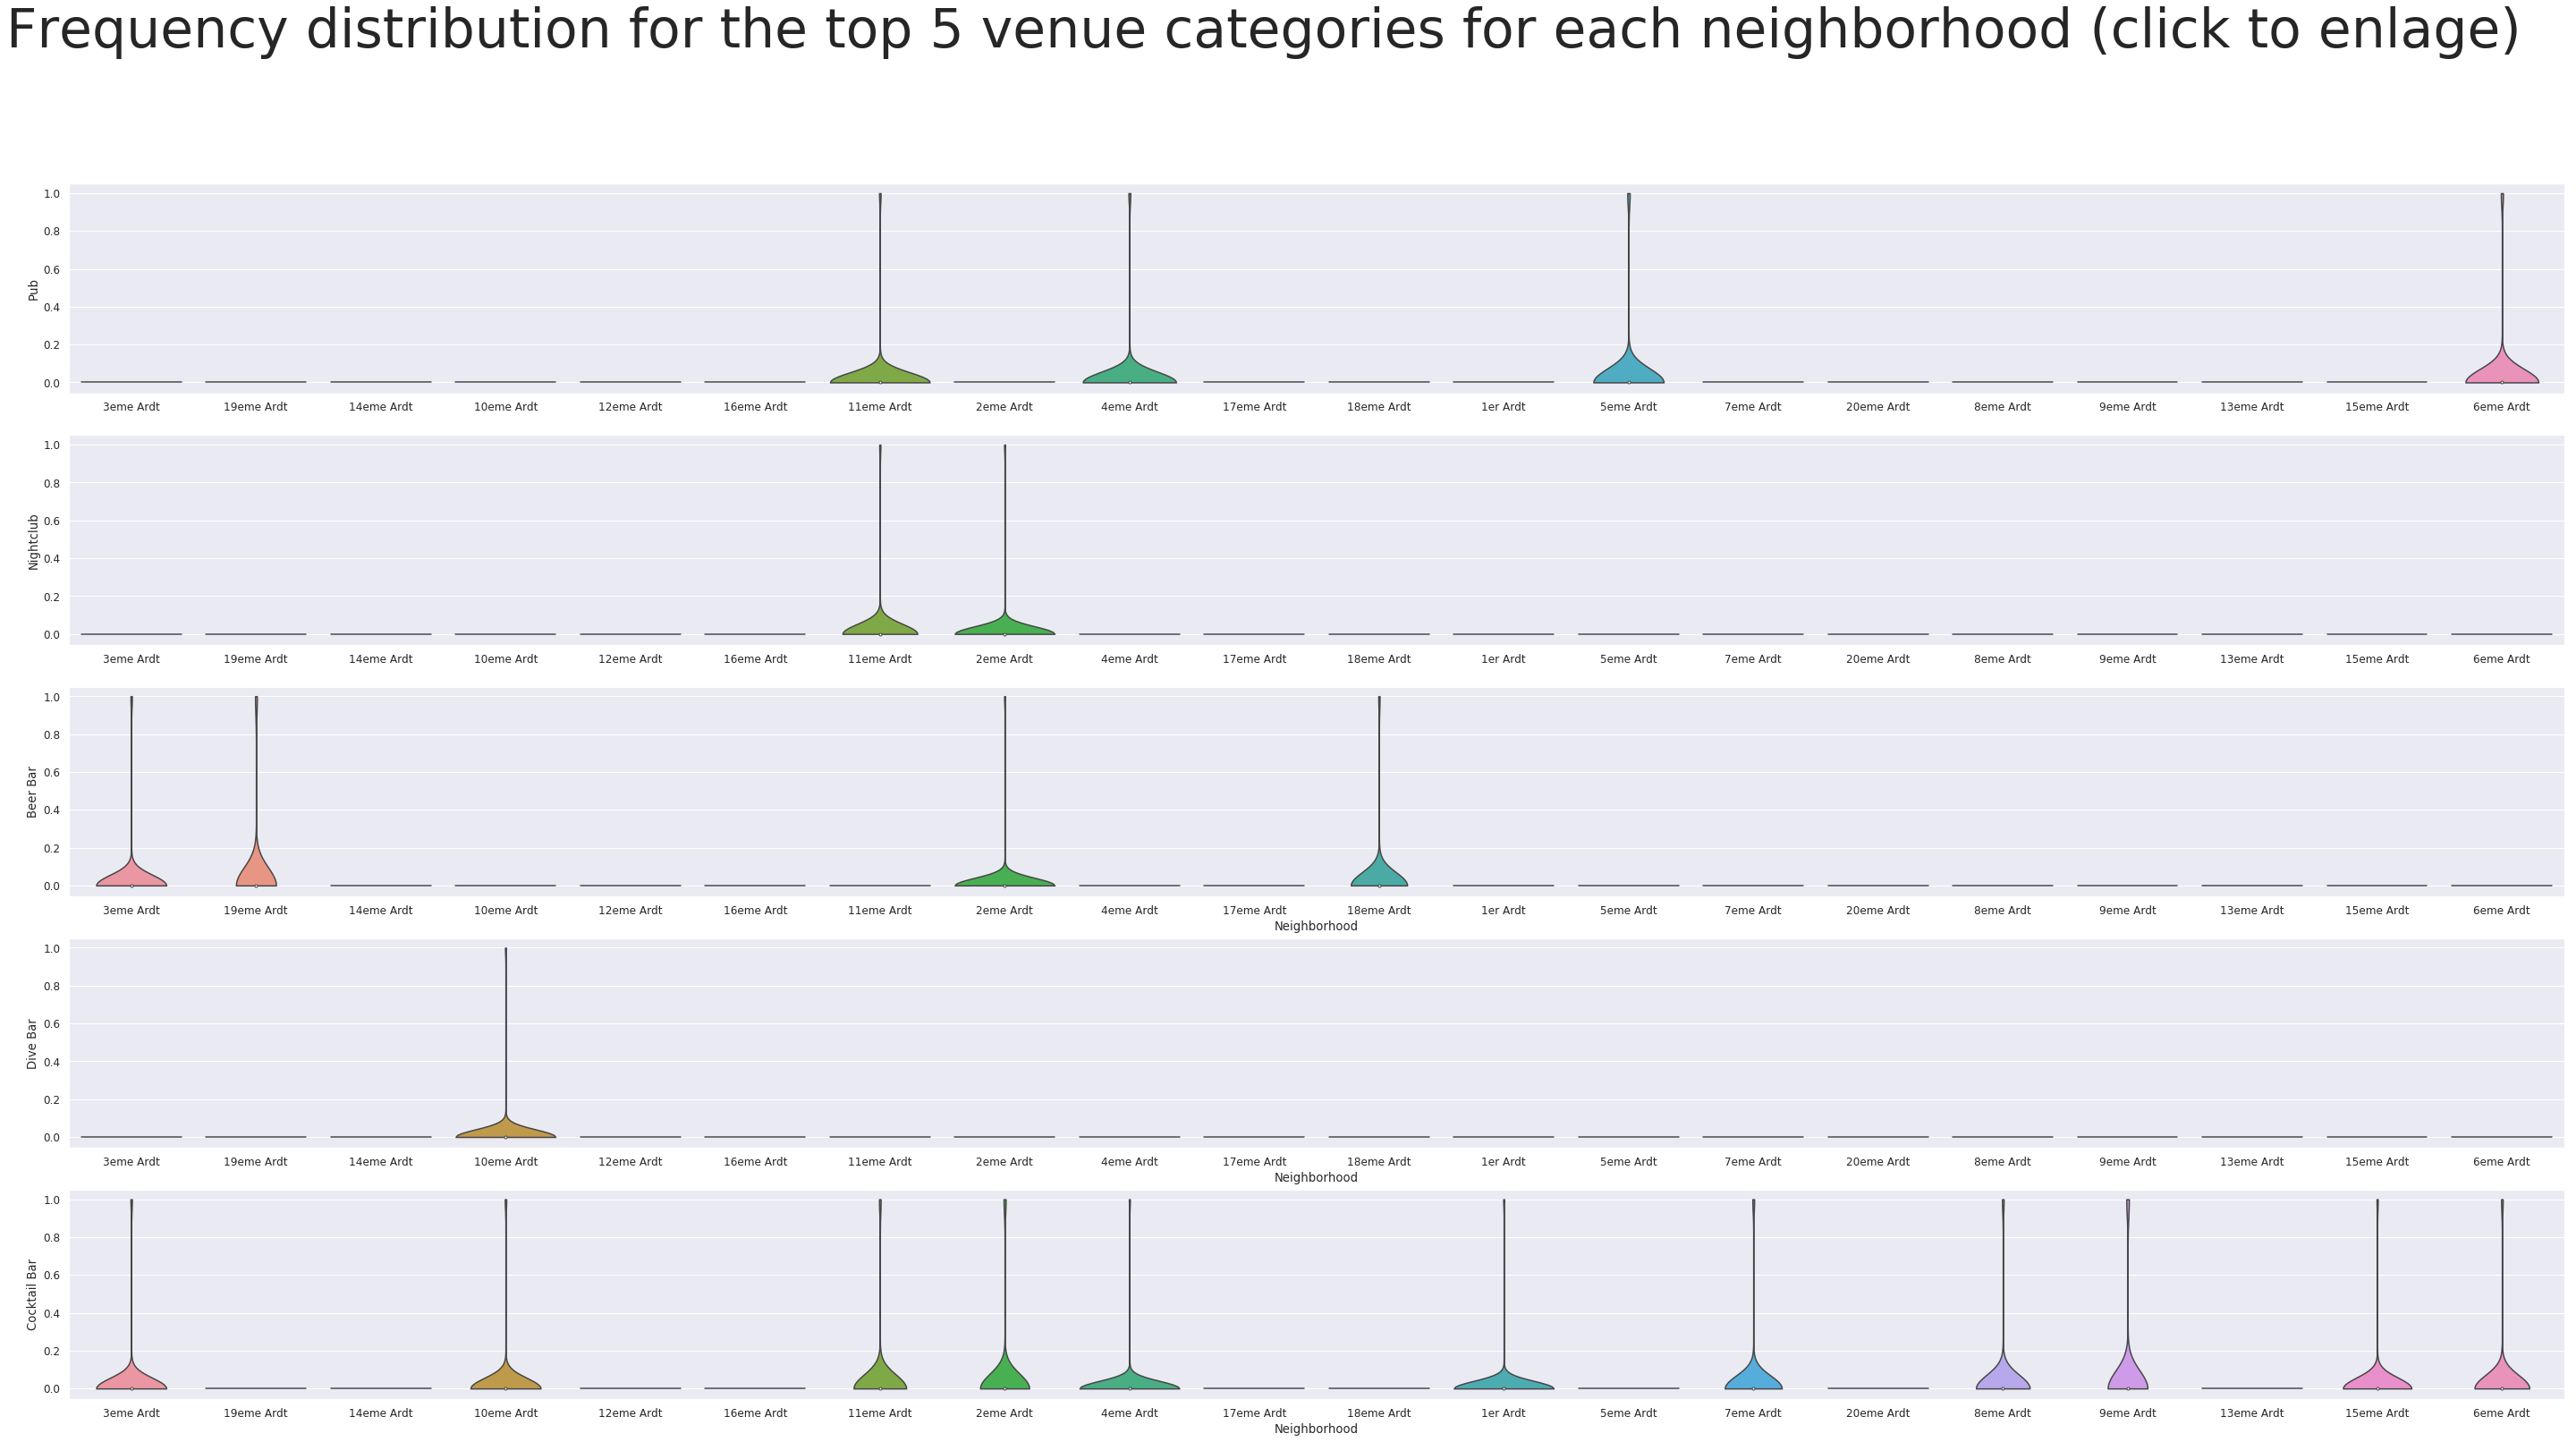

In [33]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 5 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighborhood", y="Pub", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighborhood", y="Nightclub", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighborhood", y="Beer Bar", data=paris_onehot, cut=0);

plt.subplot(5,1,4)
sns.violinplot(x="Neighborhood", y="Dive Bar", data=paris_onehot, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighborhood", y="Cocktail Bar", data=paris_onehot, cut=0);


ax.text(-1.0, 3.1, 'Frequency distribution for the top 5 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

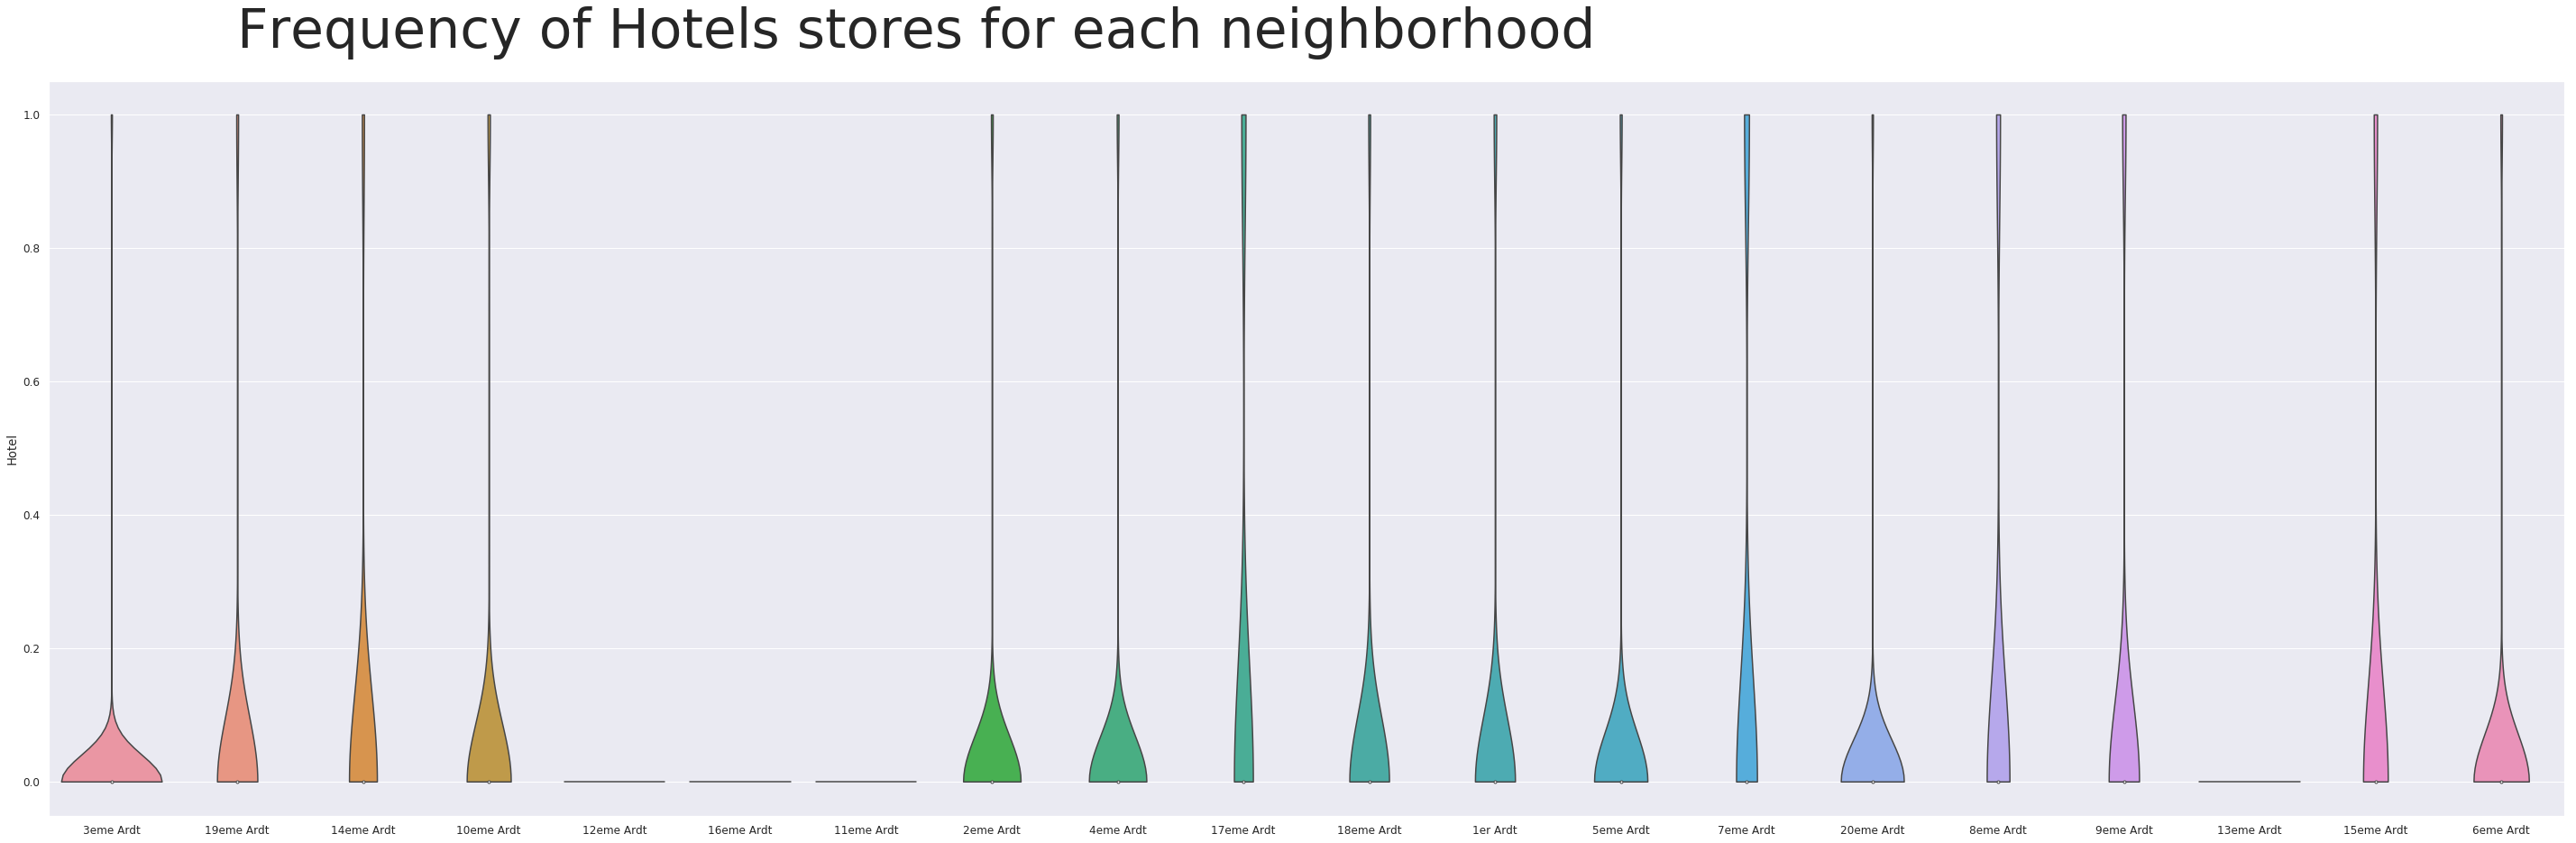

In [29]:
# Add the Hotel to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Hotel", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Hotels stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Hotel_Venues.png", dpi=240)
plt.show()

## 4 Inferences and Discussion
**Chosen Neighborhoods - Results**
Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 1 neighbourhoods from all.

The reasoning being that if the 1 criteria have been met - identifying neighbourhoods that are lively with Nightclubs, Beer Bars, Cocktails and Hotels. Not Having Pub is somthing that could be a threat or an opportunity.

So we can increase the criteria to include Restaurants, Wine Bars and Bars - which narrows down and focuses the suggested districts for Pub  to be located, and at the same time provides better locations for the brand.

So the final 1 prospective neighborhoods for new store locations are where 4 criteria are met:

- 2eme Ardt : Arrondissement 2, Bourse



Let's look at the district on a Paris map

In [30]:
# Creat a Dataframe for the Chosen District
chosen_districts= paris.loc[paris['French_Name'] == '2eme Ardt']
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
7,2,Bourse,2eme Ardt,48.868279,2.342803


## Where is our chosen district? Let's visualise them on a map of Paris

In [31]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

### Or for a closer view of Central Paris

In [32]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Observations
I guess it's not a surprise that the chosen district is very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 1 that should suit the client's interest.

### Inferences
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new pub (i) to meet the criteria of being in neighbourhoods that are lively with abundant entretaiment venues, and (ii) to narrow the search down to just a one of the main areas that are best suited to match the criteria.

### Conclusions
There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific pub locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

#### If you can't vizualize the maps in Github please acces to Watson Studio on the link below: 
https://eu-gb.dataplatform.cloud.ibm.com/analytics/notebooks/v2/6e93cf6a-024c-4d29-9fbc-91d0334ddeef/view?access_token=a7f5b9ad66d5b6a1dc697c13a1b6a30e0cd53d5b317870f1867a4a44bebb7415